# 고급 NumPy
## ndarray 객체 내부 알아보기
NumPy의 ndarray는 다양한 형태의 데이터(연속, 이산형 데이터)를 다차원 배열 객체로 해석하는 방법을 제공한다. 지금까지 살펴봤듯이 자료형 혹은  dtype은 데이터를 어떻게 해석(실수형, 정수형, 논리형 및 지금 까지 살펴본 여러 가지 유형)해야 하는지 알려주는 역활을 한다.  

ndarray를 강력하게 만들어주는 부분은 모든 배열 객체는 데이터 블록에 대한 부분적인 뷰를 제공한다는 것이다 예를 들면 배열에 대한 뷰, arr[::2, ::-1]는 어떤 데이터도 복사하지 않는다는 데 의구심을 가질 수 있다. 간단히 말해 NumPy는 dtype을 갖는 단순한 메모리 덩어리 그 이상의 것으로, 메모리 상에서 다양한 간격으로 배열을 옮길 수 있는 스트라이드(stride)정보를 가지고 있다. 좀 더 정확히 말하면 ndarray는 내부적으로 다음을 포함하고 있다.
* 데이터에 대한 포인터, 시스템 메모리를 가르킨다
* 자료형 또는 dtype
* 배열의 형태를 나타내는 튜플, 예를 들어 $10 \times 5$ 배열은 (10, 5)와 같은 형태를 취한다.

In [2]:
import numpy as np
np.ones((10, 5)).shape

(10, 5)

* 하나의 원소에서 다음 원소까지의 **너비**를 표현한 정수를 담고 있는 *스트라이드* 튜플, 예를 들면 일반적인(C 순서) $3 \times 4 \times 5 $ 크기의 float64(8바이트) 배열의 스트라이드 값은 (160, 40 ,8) 이다.

In [3]:
 np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

일반적으로 NumPy 사용자는 배열의 스트라이드에 관심을 가질 일이 거의 없으며 스트라이드 값은 배열을 복사자히 않고 뷰를 생성하기 위한 필수 값으로 사용된다. 스트라이드는 음수가 될 수도 있는데, 이런 경우에는 메모리 상에서 배열의 뒤로 이동할 수 있다.   
예를 들어 
```python
obj[::-1] 
#or
obj[:, ::-1]
```  
처럼 배열을 나눈 경우에도 사용할 수 있다. 아랫 그림은 ndarray의 내부를 단순 도식화한 것이다.
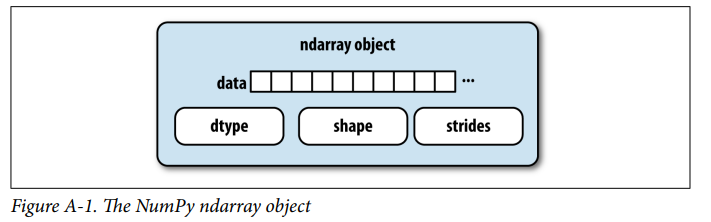
### NumPy dtype 구조
가끔 배열의 원소가 정수나 실수, 문자열, 파이썬 객체인지 검사해야 하는 코드를 작성할 일이 생긴다. 왜나하면 실수는 여러 가지 자료형(float16~float128)으로 표현되므로 자료형의 목록에서 dtype을 검사하는 일은 매우 다양하기 때문이다. 다행히도 dtype은 np.integer, np.floating 같은 상위 클래스를 가지므로 np.issubdtype 함수와 함께 사용할 수 있다.

In [4]:
ints = np.ones(10, dtype=np.uint16)

In [5]:
floats = np.ones(10, dtype=np.float32)

In [6]:
 np.issubdtype(ints.dtype, np.integer)

True

In [7]:
 np.issubdtype(floats.dtype, np.floating)

True

각 자료형의 mro 메소드를 이용해 특정 dtype의 모든 부모 클래스 목록을 확인할 수 있다.

In [9]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [10]:
np.issubdtype(ints.dtype, np.number)

True

대부분의 NumPy 사용자는 이 내용을 몰라도 상관없다  
(은 개뿔 뜯어먹는 소리! 방법론 익힐려면 어쩔수 없다 알야 한다. 물리학 전공인데 통계,수학,전산학도랑 술먹으면서 썰전 할 정도는 되야하는 참 힘든 세상...)  
하지만 알아두면 가끔은 편리하게 사용할 수 있는 기능이다.   
아래 그림은 dtype의 구조와 부모 - 자식 클래스 관계를보여준다  

         몇몇 dtype은 이름 뒤에 _를 써서 끝을 맺는데, 이는 NumPy에서 사용하는 자료형과 파이썬 내장 자료형 간의 충돌을 방지하기위함
         
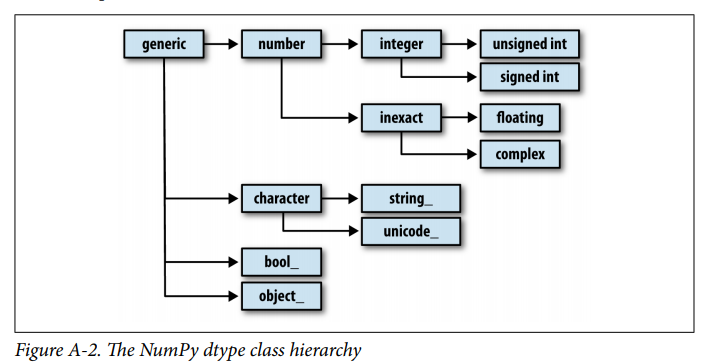

## 고급 배열 조작 기법
배열을 세련된 방법으로 색인하고 나누고 불리언으로 값을 지정하는 방법은 다양하다. 데이터 분석 애플리케이션에서 까다로운 작업의 대부분은 pandas의 상위 레벨 함수에서 처리하지만 라이브러리에 존재하지 않는 데이터 알고리즘은 직접 작성해야 하는 경우도 있다.
### 배열 재형성하기
NumPy 배열에 대해 지금까지 배운 것을 이용해 배열의 테이터를 복사하지 않고 다른 모양으로 변환할 수 있다는 점은 다소 놀라운 점이다. 배열의 모양을 변환하려면 배열의 인스턴스 메소드인 reshape 메소드에 새로운 모양을 나타내는 튜플을 넘기면 된다. 예를 들어 1차원 배열을 행렬로 바꾼다고 가정해보자

In [11]:
arr = np.arange(8)

In [12]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [13]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

다차원 배열 또한 아래 그림 처럼 재형성이 가능하다.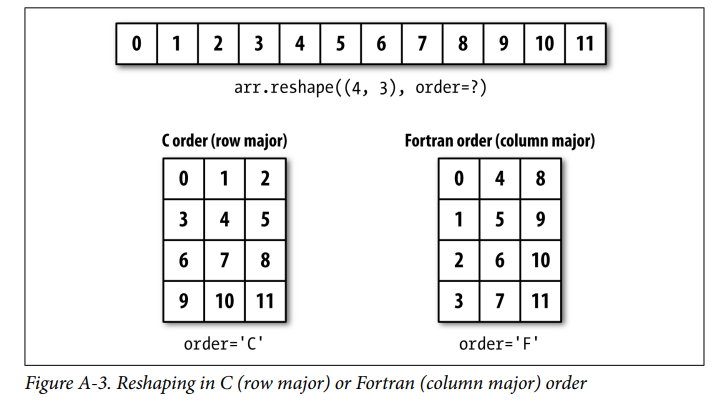

In [14]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

reshape에 넘기는 값 중 하나는 -1이 될 수도 있는데, 이 경우에는 원본 데이터를 참조해서 적절한 값을 추론하게 된다.

In [16]:
arr = np.arange(15)
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

배열의 shape 속성은 튜플이기 때문에 reshape 메소드에 이를 직접 넘기는 것도 가능한다.

In [18]:
other_arr = np.ones((3, 5))
other_arr.shape

(3, 5)

In [19]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**다차원 배열을 낮은 차원으로 변환하는 것을 *평탄화*라고 한다**

In [20]:
arr = np.arange(15).reshape((5, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [21]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

ravel 메소드는 필요하지 않다면 원본 데이터의 복사본을 생성하지 않는다.  
flatten 메소드는 ravel 메소드와 유사하게 동작하지만 항상 데이터의 복사본을 반환한다.

In [22]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

데이터는 다룬 순서로 재형성되거나 평탄화될 수있다. 이 주제는 초보 NumPy 사용자에게는 약간 설명하기 어려운 주제이므로 다음에 (자료구조와 알골리즘 알면...)
### C와 Fortran 순서( row / column 순서 )
R과 MATLAB 같은 다른 과학계산 환경과 달릴 NumPy는 메모리 상에서 데이터 배치에 대한 유연하고 다양한 제어 기능을 제공한다. 기본적으로 NumPy 배열은 _**row(행)** 우선 순위_ 로 생성된다. 이 말은 만약 2차원 배열이 있다면 배열의 각 로우에 해당하는 데이터들은 공간적으로 인접한 메모리에 적재된다는 뜻이다. 로우 우선순위가 아니면 _**column(열)** 우선순위_를 가지게 되는데, 이는 이미 눈치챘겠지만 각 칼럼에 담긴 데이터들이 인접한 메모리에 적재된다.  

역사적으로 보면 행row, 렬column 우선 순위는 C 순서, 포트란 순서로 알려져 있다. 고전 프로그래밍 언어인 Fortran 77의 경우 배열은 칼럼 우선순위로 저장된다.  

reshape, revel 같은 함수는 배열에서 데이터 순서를 나타내는 인자를 받는다. 이 값은 대부분의 'C' 아니면 'F'인데 아주 드물게 'A'나 'K'를 쓰기도 한다. 자세한거는 NumPy 문서 참조
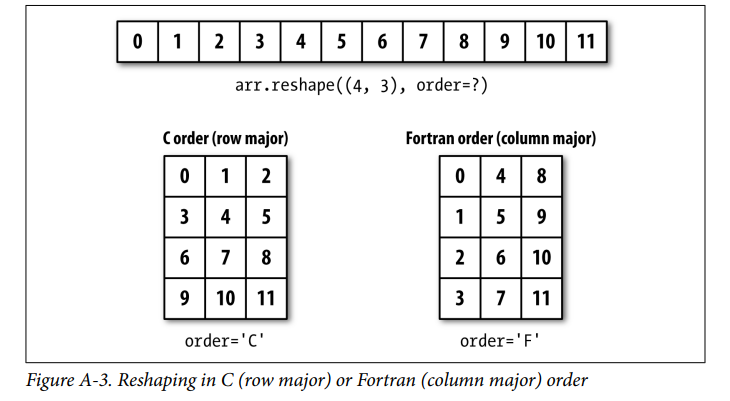

In [23]:
arr = np.arange(12).reshape((3, 4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

C와 포트란 순서의 핵심적인 차이는 어느차원 부터 처리하느냐
* C / row 우선 처리 : 상위 차원을 _먼저_ 탐색한다 (1번 축이 0번 축보다 우선 탐색된다)
* Fortran / column 우선 처리 : 상위 차원을 _나중에_ 탐색한다 (0번 축이 1번 축보다 우선 탐색된다)

### 배열 이어 붙이고 나누기
numpy.concatenate는 배열의 목록(튜플, 리스트 등)을 받아서 주어진 axis에 따라 하나의 배열로 합쳐준다.

In [26]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [27]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [28]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

vstack과 hstack 함수를 이용하면 일반적인 이어붙이기 작업을 쉽게 처리할 수 있다. 이 연산은 vstack과 hstack 메소드를 사용해서 다음 처럼 표현

In [29]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [30]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

다른 한편으로는 split 메소드를 사용해서 하나의 배열을 축을 따라 여러 개의 배열로 나눌 수 있다.

In [31]:
arr = np.random.randn(5, 2)

In [32]:
arr

array([[-0.30445771, -1.41594282],
       [ 0.24320329, -0.92396994],
       [-0.51820238,  1.07418034],
       [-1.20179225,  0.6042411 ],
       [ 0.34035442, -0.35349225]])

In [33]:
first, second, third = np.split(arr, [1, 3])

In [34]:
first

array([[-0.30445771, -1.41594282]])

In [35]:
second

array([[ 0.24320329, -0.92396994],
       [-0.51820238,  1.07418034]])

In [36]:
third

array([[-1.20179225,  0.6042411 ],
       [ 0.34035442, -0.35349225]])

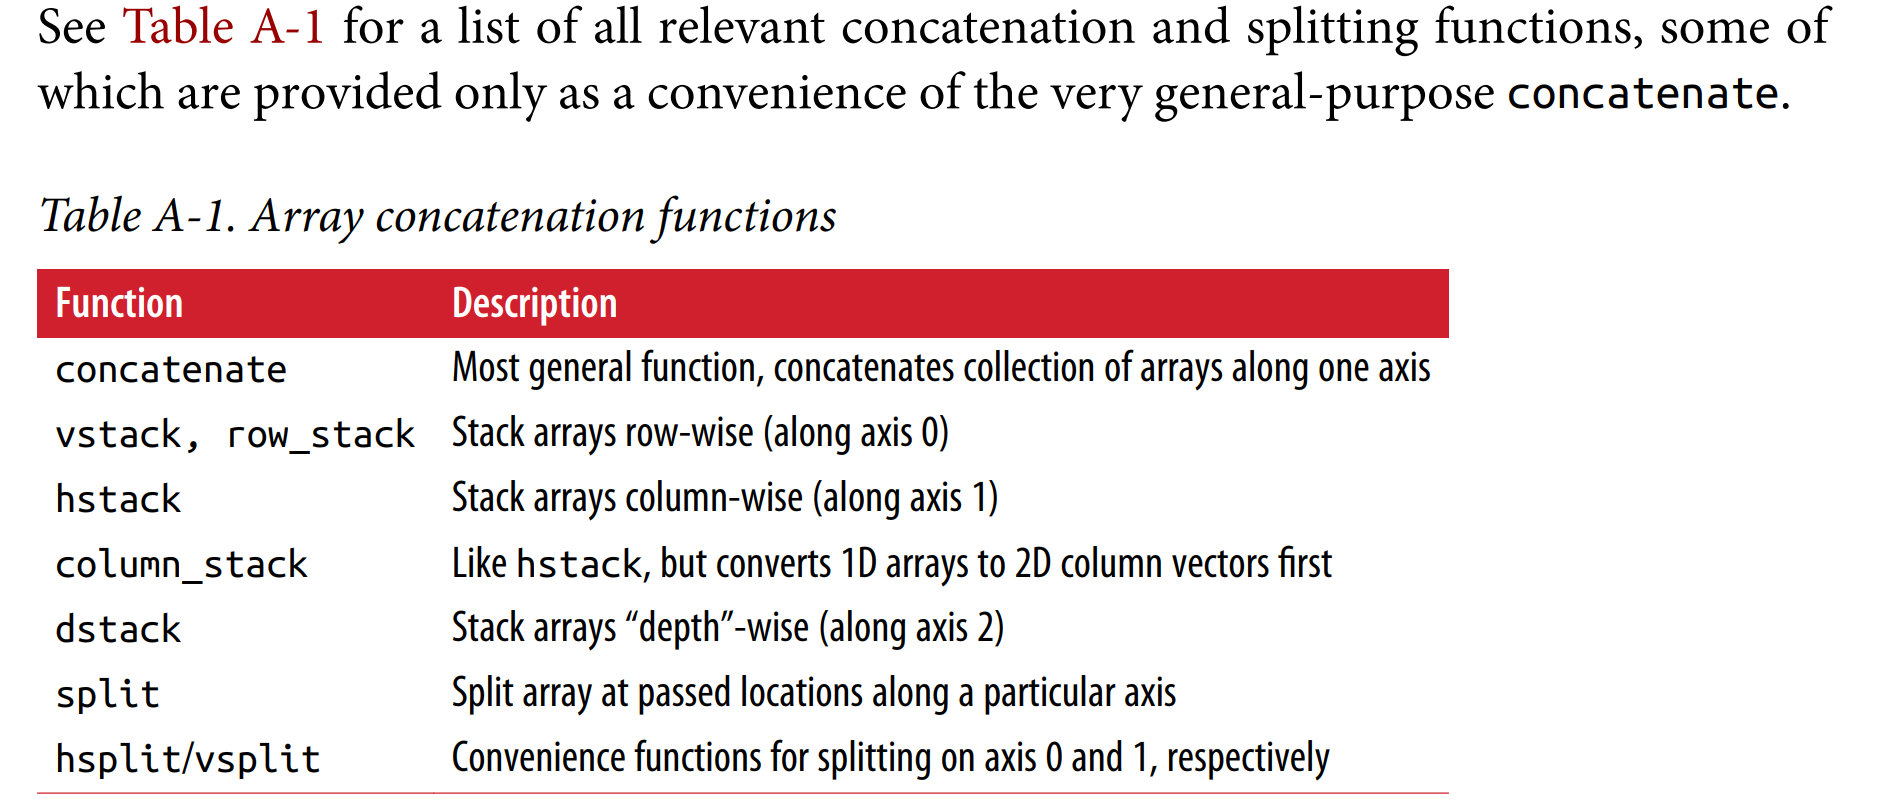

### 배열 쌓기 도우미 : ```r_ 와 c_```
NumPy의 네임 스페이스에는 ```r_ 와 c_```라는 두 가지 특수한 객체가 있는데, 이는 배열 쌓기를 좀 더 편리하게 해준다.

In [37]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = np.random.randn(3, 2)

In [38]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.61657603,  0.58378018],
       [-0.1889801 ,  1.04722663],
       [-0.46199196, -0.0581669 ]])

In [39]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [ 0.61657603,  0.58378018,  3.        ],
       [-0.1889801 ,  1.04722663,  4.        ],
       [-0.46199196, -0.0581669 ,  5.        ]])

뿐만 아니라 슬라이스를 배열로 변환해준다.

In [40]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

자세한 거는 넘파이 문서 참조
### 원소 반복시키기 : repeat와 tile
note :  
넘파이를 사용하면서 배열을 반복시키거나 같은 배열을 복사하는 일은 매트랩 같은 유명한 다른 배열 처리 언어에 비하면 흔하지 않은 일이다. 주된 이유는 _브로드캐스팅_이 휠씬 더 적합하기 때문이다.

큰 배열을 만들기 위해서 배열을 반복하거나 복제하는 함수로 repeat와 tile이 있다. repeat은 한 배열의 각 원소를 원하는 만큼 복제해서 큰 배열을 생성한다.


In [41]:
arr = np.arange(3)
arr

array([0, 1, 2])

In [42]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

기본적으로 정수를 넘기면 각 배열은 그 수만큼 반복된다. 만약 정수의 배열을 넘긴다면 각 원소는 배열에 담긴 정수 만큼 다르게 반복된다.

In [43]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

다차원 배열의 경우에는 특정 축을 따라 각 원소를 반복시킨다.

In [45]:
arr = np.random.randn(2, 2)
arr

array([[-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ]])

In [47]:
arr.repeat(2, axis=0)

array([[-0.12024244, -0.68070368],
       [-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ],
       [-0.52427974, -1.1537499 ]])

In [48]:
arr.repeat([2, 3], axis=0)

array([[-0.12024244, -0.68070368],
       [-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ],
       [-0.52427974, -1.1537499 ],
       [-0.52427974, -1.1537499 ]])

In [49]:
arr.repeat([2, 3], axis=1)

array([[-0.12024244, -0.12024244, -0.68070368, -0.68070368, -0.68070368],
       [-0.52427974, -0.52427974, -1.1537499 , -1.1537499 , -1.1537499 ]])

tile 메소드는 축을 따라 배열을 복사해서 쌓는 함수다.  
** 벽에 타일을 이어 붙이듯이 ** 같은 내용의 배열을 이어 붙인다고 생각하면 된다.

In [50]:
arr

array([[-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ]])

In [51]:
np.tile(arr, 2)

array([[-0.12024244, -0.68070368, -0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 , -0.52427974, -1.1537499 ]])

tile 메소드의 두 번째 인자는 타일의 개수로, 스칼라 값이며 칼럼 대 칼럼이 아니라 로우 대 로우로 이어 붙이게 된다.  
tile 메소드의 두 번째 인자는 **타일을 이어붙인** 모양을 나타내는 튜플이 될 수 있다.

In [52]:
arr

array([[-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ]])

In [53]:
 np.tile(arr, (2, 1))

array([[-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ],
       [-0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 ]])

In [54]:
np.tile(arr, (3, 2))

array([[-0.12024244, -0.68070368, -0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 , -0.52427974, -1.1537499 ],
       [-0.12024244, -0.68070368, -0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 , -0.52427974, -1.1537499 ],
       [-0.12024244, -0.68070368, -0.12024244, -0.68070368],
       [-0.52427974, -1.1537499 , -0.52427974, -1.1537499 ]])

### 팬시 색인 : take와 put 
NumPy`_`Basic 에서 팬시 색인 언급한것 떠올려 보면 정수 배열을 사용한 _팬시 색인_ 기능을 통해 배열의 일부 값을 지정하거나 가져올 수 있다는 것을 알 수 있을 것이다.

In [55]:
arr = np.arange(10) * 100

In [56]:
inds = [7, 1, 2, 6]

In [57]:
arr[inds]

array([700, 100, 200, 600])

ndarray에는 단일 축에 대한 값을 선택할 떄만 사용할 수 있는 유용한 메소드가 존재한다

In [58]:
arr.take(inds)

array([700, 100, 200, 600])

In [59]:
arr.put(inds, 42)

In [60]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [61]:
arr.put(inds, [40, 41, 42, 43])

In [62]:
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

다른 축에 take 메소드를 적용하려면 axis 인자를 넘기면 된다.

In [63]:
inds = [2, 0, 2, 1]

In [64]:
arr = np.random.randn(2, 4)

In [65]:
arr

array([[-0.24015549,  1.47119621, -2.06913941, -0.11532588],
       [ 0.17033884, -0.68923354, -0.34621827, -0.44288073]])

In [66]:
arr.take(inds, axis=1)

array([[-2.06913941, -0.24015549, -2.06913941,  1.47119621],
       [-0.34621827,  0.17033884, -0.34621827, -0.68923354]])

put 메소드는 axis 인자를 받지 않고 평탄화된 배열(1차원,C순서)에 대한 색인을 받으므로 (변경된 가능성이 있다) 다른 축에 대한 색인 배열을 사용해서 배열의 원소에 값을 넣으려면 팬시 색인을 이용하는 것이 좋다.

In [67]:
arr = np.random.randn(1000,50)

In [68]:
inds = np.random.permutation(1000)[:500]

In [69]:
%timeit arr[inds]

19.7 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
%timeit arr.take(inds, axis = 0)

15.4 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 브로드캐스팅
브로드캐스팅은 다른 모양의 배열 간 산술연산을 어떻게 수행해야 하는지를 설명한다. 이는 매우 강력한 기능이지만 NumPy의 오랜 사용자들도 흔히 잘못 이해하고 있는 기능이기도 하다. 브로드 캐스팅의 가장 단순한 예제는 배열과 스칼라 값을 결합할 때 발생한다.

In [71]:
arr = np.arange(5)

In [72]:
arr

array([0, 1, 2, 3, 4])

In [73]:
arr * 4

array([ 0,  4,  8, 12, 16])

여기서 스칼라 값 4는 곱셈연산 과정에서 배열의 모든 원소로 ***전파(broadcast)*** 되었다.  
예를 들어 배열의 각 칼럼에서 칼럼의 평균 값을 뺸다면 다음처럼 간단히 처리할 수 있다.

In [74]:
arr = np.random.randn(4, 3)

In [75]:
arr.mean(0)

array([-0.09118023, -0.14467752,  0.08654373])

In [76]:
demeaned = arr - arr.mean(0)

In [77]:
demeaned

array([[-0.74241783, -0.88019435,  0.50163552],
       [ 1.11905028,  0.44718977, -0.8363419 ],
       [ 0.33171112, -0.09858512, -0.64667608],
       [-0.70834357,  0.5315897 ,  0.98138247]])

In [79]:
demeaned.mean(0)

array([ -2.77555756e-17,   0.00000000e+00,  -2.77555756e-17])

아래 그림에 브로드캐스팅 과정이 묘사되어 있다. 위 브로드캐스팅 연산을 로우에 대해서 수행한다면 좀 더 주의를 기울여야 한다. 다행히도 브로드캐스팅 규칙을 따르기만 한다면 잠재적으로 낮은 차원의 값을 배열의 다른 차원으로 브로드캐스팅하는 것도 가능하다.  
아래 그림은 1차원 배열로 0축에 대해 브로드 캐스팅하기
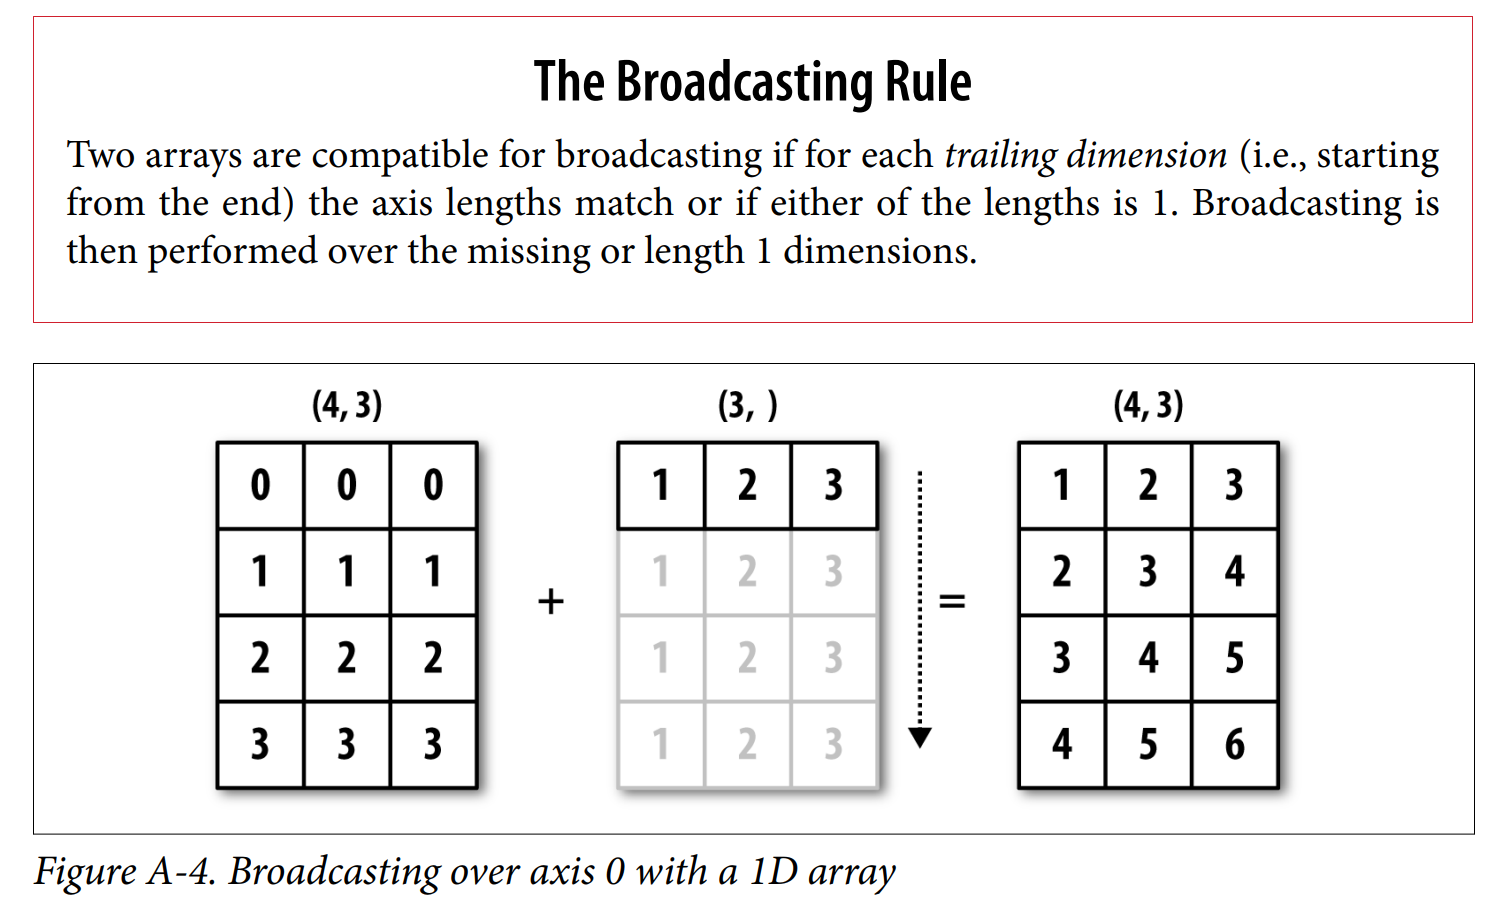
### 브로드캐스팅 규칙 ###
만일 _이어지는 _각 차원(시작부터 끝까지)에 대해 축의 길이가 일치하거나 둘 중 하나의 길이가 1이라면 두 배열은 브로드캐스팅 호환이다. 브로드캐스팅 호환이다. 브로드캐스팅은 누락된, 혹은 길이가 1인 차원에 대해 수행된다.

아무리 NumPy에 익숙한 사용자일지라도 종종 멈춰서 그림을 그리고 브로드캐스팅 규칙에 대해 생각해봐야 한다.  
이전 예제에서 칼럼이 아니라 각 로우에서 평균 값을 뺀다고 가정해보자.
```python arr.mean(0)``` 은 길이가 3이고 arr의 이어지는 크기 역시 3 이므로 0축에 대해서 브로드 캐스팅이 가능하다.  
브로드캐스팅 규칙에 따르면 1번 축에 대해서 뺄셈을 하려면(각 로우에서 로우 평균값을 빼려면) 작은 키기의 배열(4, 1)의 크기가 되어야 한다.

In [80]:
arr

array([[-0.83359805, -1.02487187,  0.58817925],
       [ 1.02787005,  0.30251226, -0.74979817],
       [ 0.24053089, -0.24326264, -0.56013235],
       [-0.7995238 ,  0.38691218,  1.0679262 ]])

In [81]:
row_means = arr.mean(1)

In [82]:
row_means.shape

(4,)

In [83]:
row_means.reshape((4, 1))

array([[-0.42343023],
       [ 0.19352805],
       [-0.18762137],
       [ 0.21843819]])

In [84]:
demeaned = arr - row_means.reshape((4, 1))

In [85]:
demeaned.mean(1)

array([  7.40148683e-17,  -3.70074342e-17,   0.00000000e+00,
         3.70074342e-17])

위 브로드캐스팅을 묘사한 그림이다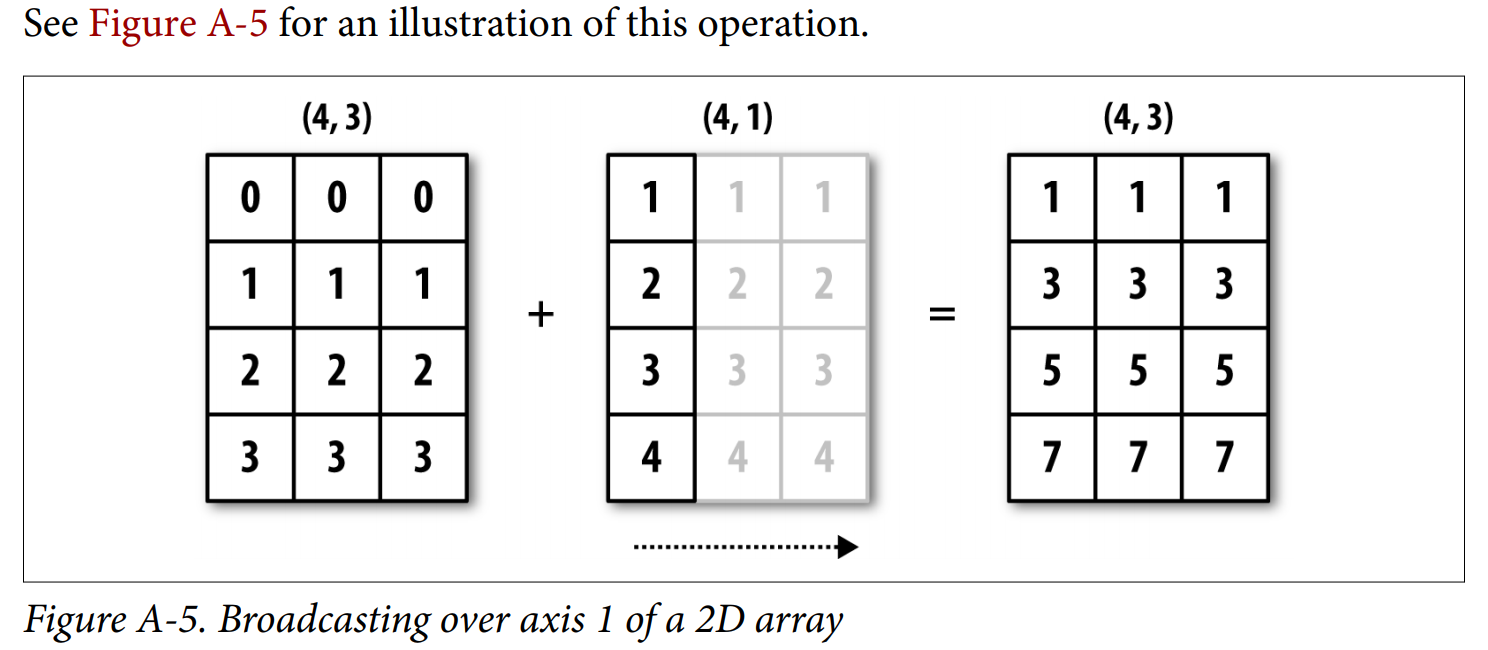

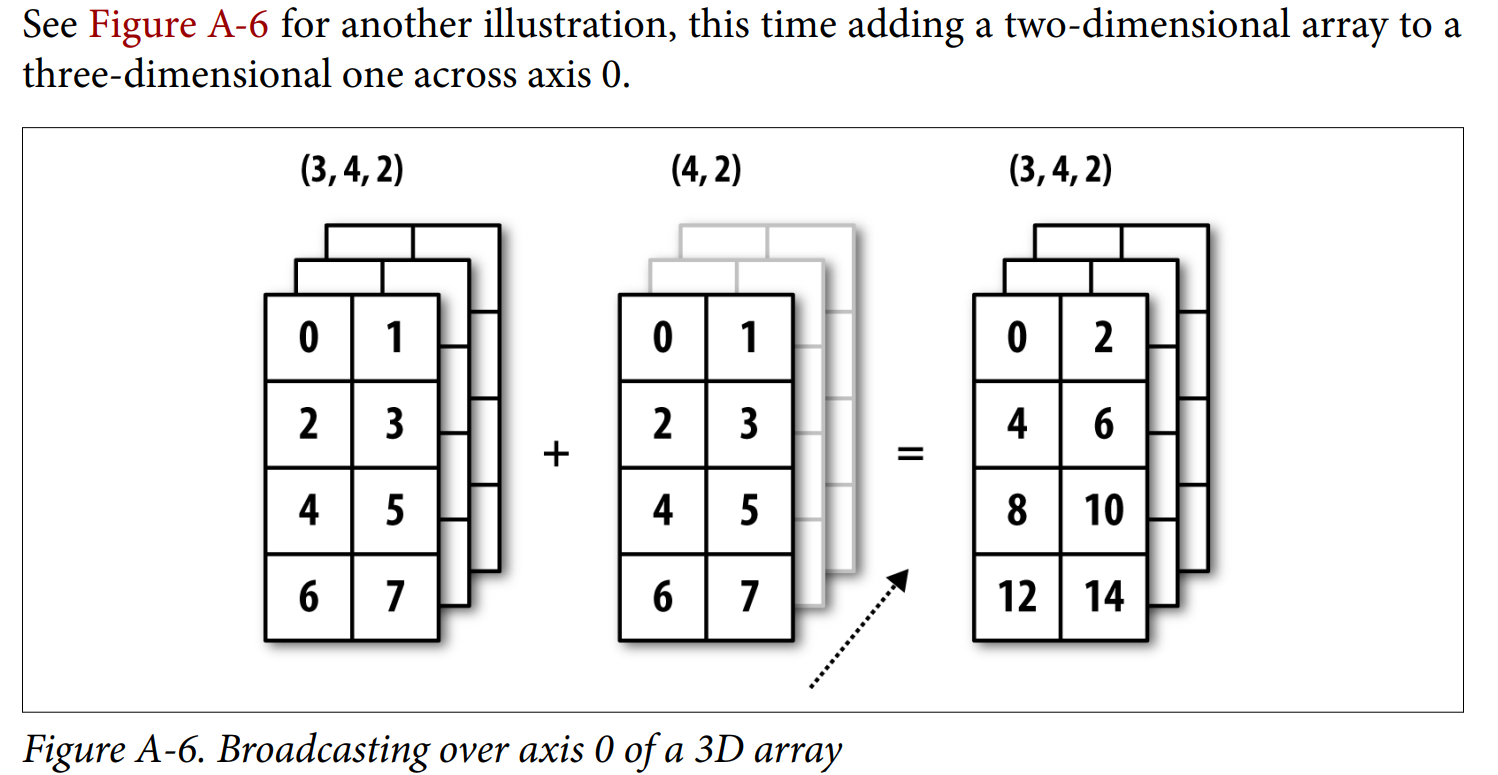
### 다른 축에 대해 브로드캐스팅하기
다차원 배열에서의 브로드캐스팅은 정말 머리에 쥐가 나는 작업이지만 규칙을 잘 지키기만 하면 된다.  
규칙을 지키지 못하면 다음과 같은 오류가 발생하게 될 것이다.

In [86]:
arr - arr.mean(1)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

낮은 차원의 배열로 0번 축이 아닌 다른 축에 대해 산술연산을 수행하는 일은 흔히 있을 수 있는 일이다. 브로드캐스팅 규칙을 따르자면 전파되는 차원은 작은 배열에서는 반드시 1이어야 한다. 로우에서 평균 값을 뺴는 앞의 예제에서 로우 평균 값은 (4, )가 아니라 (4, 1)로 재형성한다는 의미다.

In [87]:
arr - arr.mean(1).reshape((4, 1))

array([[-0.41016783, -0.60144165,  1.01160947],
       [ 0.83434201,  0.10898421, -0.94332621],
       [ 0.42815226, -0.05564127, -0.37251098],
       [-1.017962  ,  0.16847399,  0.84948801]])

3차원의 경우 세가지 차원 중 어느 하나에 대한 브로드캐스팅은 호환되는 모양으로 데이터를 재형성 하면 된다.
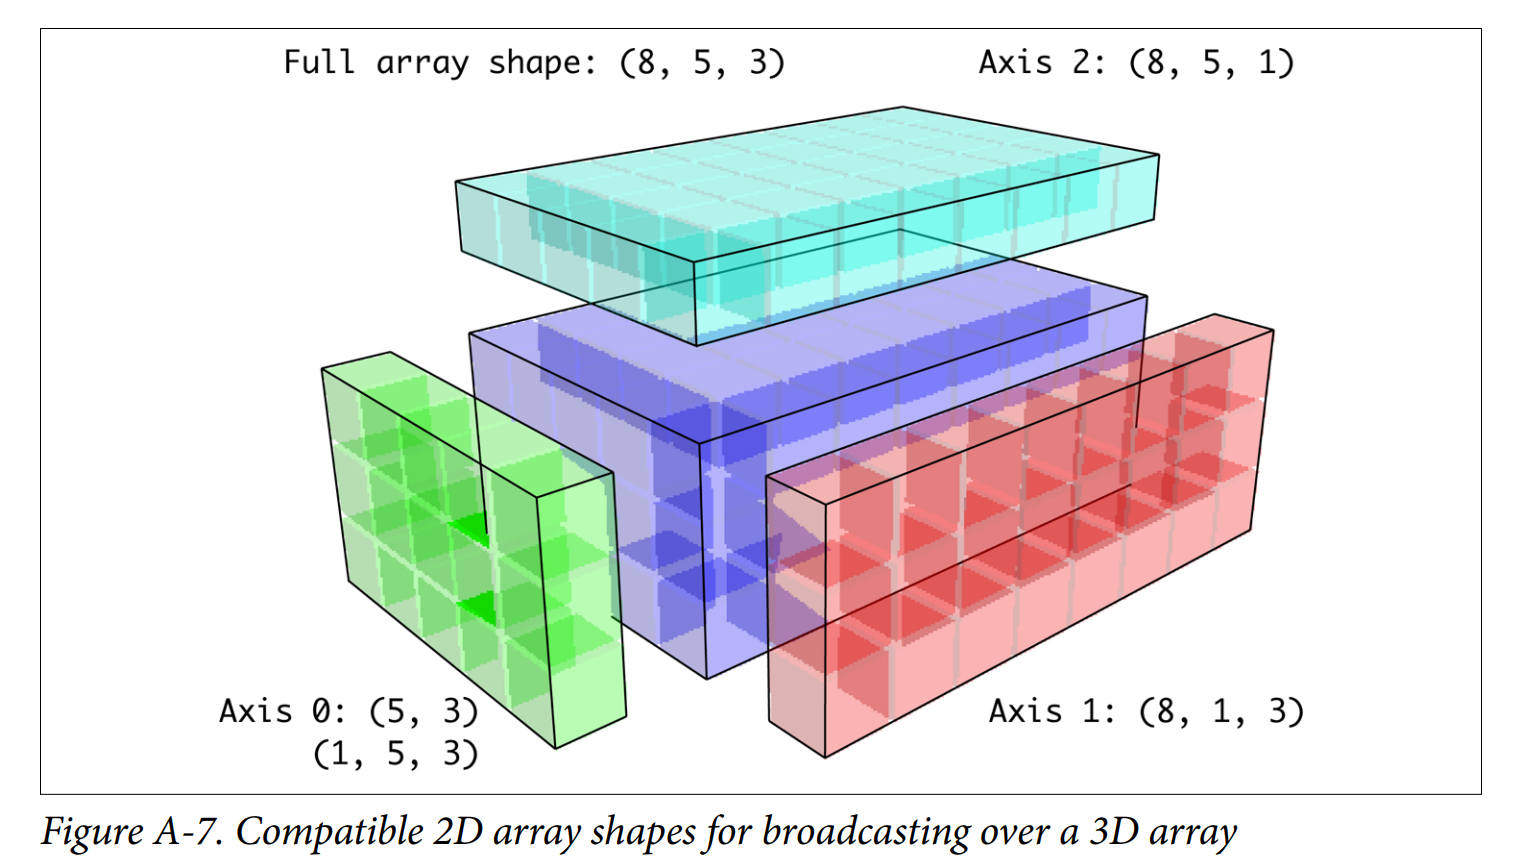
위 그림을 보면 3차원 배열의 각 축에 대해서 브로드캐스팅하기 위해 필요한 2차원 배열의 모습을 잘 묘사해놓았다.  
따라서 아주 일반적인 문제는 브로드캐스팅 전용 목적으로 길이가 1인 새로운 축을 추가해야 한다는 것이다. reshape를 사용하는 것도 한 방법이지만 축을 하나 새로 추가하는 것은 새로운 모양을 나타낼 튜플을 하나 생성해야 하는데, 이는 꽤 지루한 방법이므로 NumPy 배열은 색인을 통해 새로운 축을 추가하는 특수한 문법을 제공한다.  
**np.newaxis**라는 이 특수한 속성을 배열의 **전체** 슬라이스와 함께 사용해 새로운 축을 추가할 수 있다.

In [88]:
arr = np.zeros((4, 4))

In [89]:
arr_3d = arr[:, np.newaxis, :]

In [90]:
arr_3d.shape

(4, 1, 4)

In [91]:
arr_1d = np.random.normal(size=3)

In [92]:
arr_1d[:, np.newaxis]

array([[-0.13100919],
       [ 0.51093141],
       [ 1.44068884]])

In [93]:
arr_1d[np.newaxis, :]

array([[-0.13100919,  0.51093141,  1.44068884]])

이렇게 해서 만약 3차원 배열에서 2번 축에 대해 평균 값을 빼고 싶다면 다음과 같이 작성하기만 하면 된다.

In [94]:
arr = np.random.randn(3, 4, 5)

In [95]:
 depth_means = arr.mean(2)

In [96]:
depth_means

array([[ 0.69864078,  0.21546173,  0.02595564, -0.13332053],
       [-0.36881055, -0.29853101, -0.42771699,  0.29316377],
       [-0.33778798, -0.00796337,  0.39885117,  0.89335626]])

In [97]:
depth_means.shape

(3, 4)

In [98]:
demeaned = arr - depth_means[:, :, np.newaxis]

In [99]:
demeaned.mean(2)

array([[  3.33066907e-17,   0.00000000e+00,  -4.99600361e-17,
         -1.11022302e-17],
       [ -1.11022302e-17,  -2.22044605e-17,  -6.66133815e-17,
          4.44089210e-17],
       [ -2.22044605e-17,   2.63677968e-17,   0.00000000e+00,
          4.44089210e-17]])

이해가 잘 안 되더라도 실망하지 말자. 계속 연습하면 언젠가는 요령을 터특하게 될 것이다.  
성능을 떨어뜨리지 않으면서 한 축에 대해 평균 값을 빼는 과정을 일반화할 수는 없을지 궁금할 것이다.  
방법은 없는 건 아니지만 색인을 이용한 약간의 꼼수가 필요하다.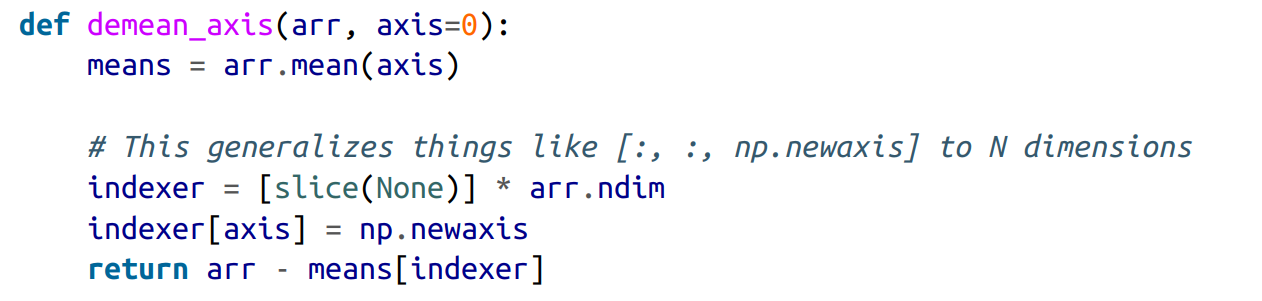

### 브로드캐스팅 이용해 배열에 값 대입하기
배열의 색인을 통해 값을 대입할 떄도 산술연산에서의 브로드캐스팅 규칙이 적용된다. 간단하게는 다음과 같이 할 수 있을 것이다.

In [100]:
arr = np.zeros((4, 3))

In [101]:
arr[:] = 5

In [102]:
arr

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

하지만 만약 값이 담긴 1차원 배열이 있고, 그 배열의 칼럼에 값을 대입하고 싶다면 배열의 모양이 호환되는 한 그렇게 하는 것도 가능하다.

In [103]:
col = np.array([1.28, -0.42, 0.44, 1.6])

In [104]:
arr[:] = col[:, np.newaxis]

In [105]:
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [106]:
arr[:2] = [[-1.37], [0.509]]

In [107]:
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

## 고급 ufunc 사용법
많은 NumPy 사용자들은 유니버셜 함수로 제공되는 빠른 원소별 연산만 주로 사용하는 경향이 있는데 이런 경우 반복문을 작성하지 않고 좀 더 간결한 코드를 작성할 수 있는 다양한 부가적인 기능이 있다.
### ufunc 인스턴드 메소드
NumPy의 이항 ufunc는 그런 특수한 벡터 연산을 수행하기 위해 특수한 메소드를 제공한다.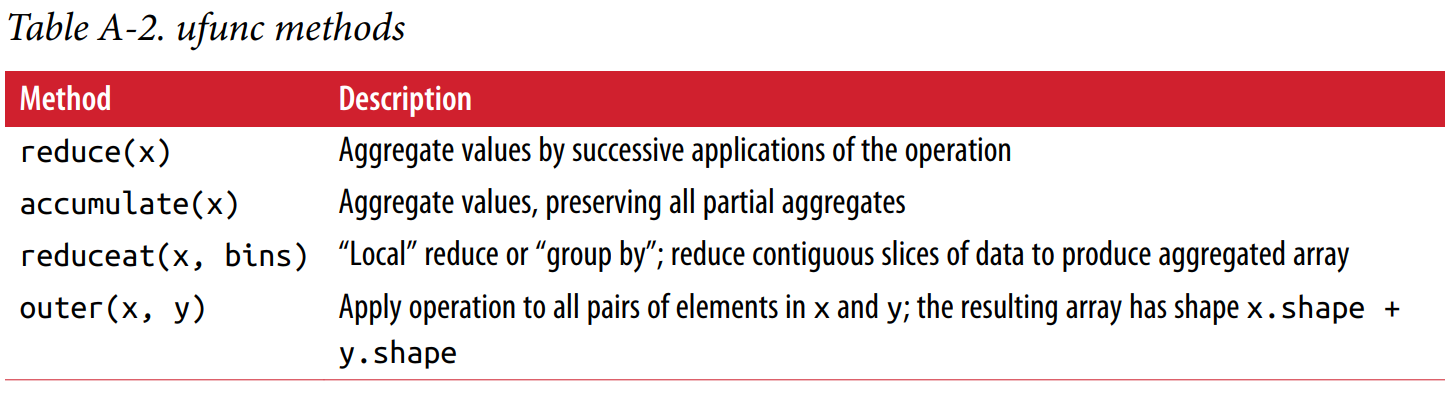
이 메소드는 위 그림에 정리해두었지만 어떻게 동작하는지는 몇 가지 예제를 통해 살펴보자.  
reduced는 하나의 배열을 받아 순차적인 이항연산을 통해 축을 따라 그 값을 집계해준다.  
예를 들어 배열의 모든 원소를 더하는 방법으로 **np.add.reduce**를 사용할 수 있다.

In [108]:
arr = np.arange(10)
np.add.reduce(arr)

45

In [109]:
arr.sum()

45

시작 값(add에서는 0)은 ufunc에 의존적이다. 만약 axis 인자 넘어오면 reduce는 그 축을 따라 수행 된다. 이를 통해 축약된 방법으로 어떤 질문에 대한 답을 구할 수 있을 것이다. 약간 복잡한 예제이긴 하지만 **np.logical`_`and**를 사용해서 배열의 각 로우에 있는 값이 정렬된 상태인지 검사하는 것을 생각해볼 수 있다.

In [110]:
np.random.seed(12346) # for reproducibility
arr = np.random.randn(5, 5)

In [111]:
 arr[::2].sort(1) # sort a few rows

In [112]:
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [113]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True], dtype=bool)

당연히 logical_and.reduce는 all 메소드와 동일하다.  
accumulate는 cumsum 메소드나 sum 메소드와 마찬가리로 reduce 메소드와 관련이 있다. accumulate 메소드는 누게를 담고 있는 같은 크기의 배열을 생성한다.

In [115]:
arr = np.arange(15).reshape((3, 5))

In [116]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]], dtype=int32)

outer 메소드는 두 배열 간의 벡터 곱, 외적을 계산한다.

In [117]:
arr = np.arange(3).repeat([1, 2, 2])

In [118]:
arr

array([0, 1, 1, 2, 2])

In [119]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

outer 메소드는 결과의 차원은 입력된 차원의 합이 된다.

In [120]:
x, y = np.random.randn(3, 4), np.random.randn(5)
result = np.subtract.outer(x, y)
result.shape

(3, 4, 5)

마지막으로 reduceat 메소드는 **local reduce**를 수행하는데, 본질적으로 배열의 groupby 연산으로 배열의 슬라이스를 모두 함께 집계한 것이다. pandas의 GroupBy 기능보다 유연하지는 못하지만 적절한 상황에서 사용한다면 매우 빠르고 강력한 메소드이다. redeceat 메소드는 값을 어떻게 나누고 집계할지 나타내는 **경계** 목록을 인자로 받는다.

In [121]:
arr = np.arange(10)
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17], dtype=int32)

이 결과는 arr[0:5],arr[5:8], arr[8:]에 대한 수행 결과 (여기선 합). 다른 메소드와 마찬가지로 axis 인자를 넘겨줄 수 있다.

In [122]:
arr = np.multiply.outer(np.arange(4), np.arange(5))

In [123]:
arr

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

In [124]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]], dtype=int32)

### 사용자 ufunc  (writing New ufuncs in Python)
ufunc와 유사한 사용자 함수를 만들 수 있는 몇 가지 기능이 있다. numpy.frompyfunc는 입력과 출력에 대한 표준과 함께 파이썬 함수를 인자로 취급한다. 예를 들어 원소별로 합을 구하는 함수는 다음과 작성할 수 있다.

In [125]:
def add_elements(x, y):
    return x + y
add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

frompyfunc를 이용해서 생성한 함수는 항상 파이썬 객체가 담긴 배열을 반환하는데, 이는 그다지 유용하지 않다. 다행스럽게도 대안이 있는데, numpy.vectorize를 사용하면 자료형을 추론한다는 이점이 있다. 하지만 이 함수는 기능이 조금 미흡하다.

In [126]:
add_them = np.vectorize(add_elements, otypes=[np.float64])

In [127]:
add_them(np.arange(8), np.arange(8))

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.])

이 두 함수는 ufunc 스타일의 함수 만드는 방법을 제공하지만 각 원소를 계산하기 위해 파이썬 함수를 호출하게 되므로 NumPy의 C 기반 ufunc 반복문보다 많이 느리다.

In [128]:
arr = np.random.randn(10000)

In [129]:
%timeit add_them(arr, arr)

1.59 ms ± 34.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [130]:
%timeit np.add(arr, arr)

3.31 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


과학계산 파이썬 커뮤니티에서는 내장 ufunc에 버금가는 성능을 가진 새로운 ufunc를 쉽게 정의할 수 있도록 **Numba project** 라는것을 하고있다.

## 구조화된 배열과 레코드 배열
지금쯤은 ndarray가 *** 단일 *** 데이터 저장소라는 사실을 눈채챘을 것이다. 이 말은 각 원소는 dtype에 의해 결정된, 같은 크기의 메모리를 차지하고 있다는 뜻이다. 표면적으로 다중 데이터나 표 형식의 데이터를 표현할 수 없는 것 처럼 보인다.  
*구조화된* 배열은 배열의 각 원소가 C의 구조체 혹은 다양한 이름의 필드를 갖는 SQL 테이블의 한 로우라고 생각할 수 있는 ndarray이다 (그래서 구조화된 배열이라고 한다)  
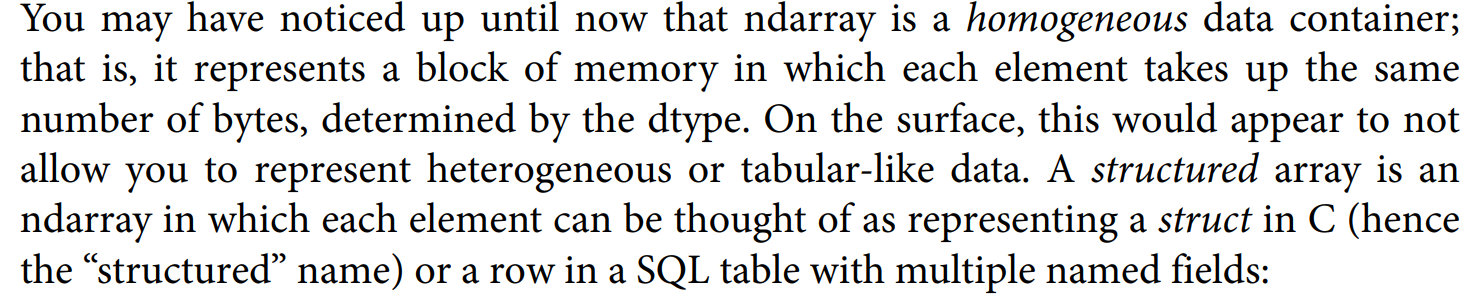

In [131]:
dtype = [('x', np.float64), ('y', np.int32)]

In [132]:
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([( 1.5       ,  6), ( 3.14159265, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

구조화된 dtype을 지정하는 방법은 여러 가지다(NumPy 문서를 참고하자). 일반적인 방법중 하나는 튜플(field`_`name, field`_`data`_`type)을 이용하는 방법이다. 이제 sarr의 각 원소는 사전처럼 접근할 수 있는 튜플 같은 객체이다.

In [133]:
sarr[0]

( 1.5, 6)

In [134]:
sarr[0]['y']

6

필드 이름은 dtype.names 속성에 저장된다. 구조화된 배열의 필드에 접근하면 데이터의 뷰가 반환되며 따라서 아무것도 복사되지 않는다.

In [135]:
sarr['x']

array([ 1.5       ,  3.14159265])

### 중첩된 dtype과 다차원 필드
구조화된 dtype을 지정할 때 추가적으로 그 모양(정수나 튜플)을 전달 할 수 있다.

In [136]:
dtype = [('x', np.int64, 3), ('y', np.int32)]

In [137]:
arr = np.zeros(4, dtype=dtype)

In [138]:
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

이 경우 x 필드는 각 원소에 대해 길이가 3인 배열을 참조하게 된다.

In [139]:
arr[0]['x']

array([0, 0, 0], dtype=int64)

편리하게도 arr['x']로 접근하면 이전 예제에서처럼 1차원 배열 대신 2차원 배열이 반환된다.

In [140]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

이를 통해 좀 더 복잡한 중첩 구조를 하나의 배열 안에서 단일 메모리로 표현할 수 있게 된다.  
dtype를 무한히 복잡하게 만들 수 있으며, 중첩된 dtype도 만들 수 있다. 다음의 간단한 예제를 살펴보자.

In [141]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]

In [142]:
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)

In [143]:
data['x']

array([( 1.,  2.), ( 3.,  4.)],
      dtype=[('a', '<f8'), ('b', '<f4')])

In [144]:
data['y']

array([5, 6])

In [145]:
data['x']['a']

array([ 1.,  3.])

위에서 확인할 수 있듯이 다양한 형태의 필드와 중첩된 레코드는 특정 상황에서는 매우 강력한 기능을 발휘할 수 있다. 이와 대조적으로 pandas와 DataFrame의 계층적 색인이 이와 유사하긴 하지만 이런 기능을 직접 지원하지는 않는다.
### 구조화된 배열을 사용해야 하는 이유
pandas의 DataFrame과 비교해보면 NumPy의 구조화된 배열은 상대적으로 저수준의 도구이며, 메모리 블럭을 복잡하게 중첩된 칼럼이 있는 표 형시거럼 해석할 수 있는 방법을 제공한다. 배열의 각 원소는 메모리 상에서 고정된 크기의 바이트로 표현되기 때문에 구조화된 배열은 데이터를 디스크에서 읽거나 쓰고 (나중에 살펴볼 메모리-맵을 포함하여) 네트워크를 통해 전송할 때 매우 빠르고 효과적인 방법을 제공한다.  

구조화된 배열의 또 다른 사용 방법으로 데이터 파일을 고정된 크기의 레코드 바이트 스트림으로 기록하는 것은 C나 C++ 코드에서 데이터를 직렬화하는 일반적인 방법이다. 파일의 포멧을 알고 있다면(즉, 각 레코드의 크기와 순서, 바이트 크기를 그리고 각 원소의 자료형을 알고 있다면)  np.fromfile을 사용해서 데이터를 메모리로 읽어 들일 수 있다. 이와 같은 특수한 사용법은 이 책에서 다루는 내용의 범주를 벗어나지만 그런 방법이 가능하다는 것을 알아두는 것도 가치가 있는 일이다.
### 구조화된 배열 다루기 : numpy.lib.recfunctions
구조화된 배열은 DataFrame 만큼 많은 함수를 가지고 있지 않지만 NumPy 모듈인 numpy.librecfunctions에 필드를 추가, 삭제하거나 기본적인 조인과 유사한 연산을 수행할 수 있는 몇 가지 유용한 도구가 있다. 이 도구에 대해 기억해야 할 것은 dtype에 어떤 변경(칼럼을 추가, 삭제하는 등) 가하기 위해서는 일반적으로 새로운 배열을 생성해야 하다는 것이다.  
**numpy.lib.recfunctions**은 numpy 문서를 찾아보라
## 정렬에 관하여
파이썬의 내장 리스트와 마찬가지로 ndarray의 sort 인스턴스 메소드는 새로운 배열을 생성하지 않고 직접 해당 배열의 내용을 정렬한다.

In [147]:
arr = np.random.randn(6)

In [148]:
arr

array([-0.33176812, -1.47108206,  0.87050269, -0.08468875, -1.13286962,
       -1.01114869])

In [149]:
arr.sort()

In [150]:
arr

array([-1.47108206, -1.13286962, -1.01114869, -0.33176812, -0.08468875,
        0.87050269])

**배열을 그대로 정렬할 때는 그 배열이 다른 ndarray의 뷰일 경우 원본 배열의 값이 변경된다는 점 꼭 기억 해야함**

In [151]:
arr = np.random.randn(3, 5)

In [152]:
arr

array([[-0.34357617,  2.17140268,  0.12337075, -0.01893118,  0.17731791],
       [ 0.7423957 ,  0.85475634,  1.03797268, -0.32899594, -1.11807759],
       [-0.24152521, -2.0051193 ,  0.73788753, -1.06137462,  0.59545348]])

In [153]:
arr[:, 0].sort() # Sort first column values in-place 첫 번째 열의 값을 정렬한다.

In [154]:
arr

array([[-0.34357617,  2.17140268,  0.12337075, -0.01893118,  0.17731791],
       [-0.24152521,  0.85475634,  1.03797268, -0.32899594, -1.11807759],
       [ 0.7423957 , -2.0051193 ,  0.73788753, -1.06137462,  0.59545348]])

다른 한편으로는 numpy.sort를 사용해 정렬된 배열의 복사본을 생성할 수 있다. 그 외에는 ndarray.sort와 같은 인자(kind 같은)를 받는다.

In [156]:
arr = np.random.randn(5)

In [157]:
arr

array([-0.26822958,  1.33885804, -0.18715572,  0.91108374, -0.32150045])

In [158]:
np.sort(arr)

array([-0.32150045, -0.26822958, -0.18715572,  0.91108374,  1.33885804])

In [159]:
arr

array([-0.26822958,  1.33885804, -0.18715572,  0.91108374, -0.32150045])

여기서 소개한 모든 정렬 메소드는 전달된 축에 독립적으로 정렬을 수행하기 위해 axis 인자를 받는다.

In [160]:
arr = np.random.randn(3, 5)

In [161]:
arr

array([[ 1.00543901, -0.51683937,  1.19251887, -0.19893404,  0.39691349],
       [-1.76381537,  0.60709023, -0.22215536, -0.21707838, -1.21357483],
       [-0.87044607, -0.2305542 ,  1.04376344, -1.14410284, -0.36360302]])

In [162]:
arr.sort(axis=1)

In [163]:
arr

array([[-0.51683937, -0.19893404,  0.39691349,  1.00543901,  1.19251887],
       [-1.76381537, -1.21357483, -0.22215536, -0.21707838,  0.60709023],
       [-1.14410284, -0.87044607, -0.36360302, -0.2305542 ,  1.04376344]])

어떤 정렬 메소드도 내림차순 정렬 옵션이 없다는 걸 알 수 있다. 배열의 슬라이스는 복사본을 만들거나 어떠한 연산도 수행하지 않고 그저 뷰를 생성하기 때문에 이는 사실 큰 문제가 되지 않는다. 많은 파이썬 사용자들은 **values[::-1]**을 통해 순서가 뒤집어진 리스트를 얻어내는 트릭에 익숙하다. ndarray에도 마친가지로 사용할 수 있다.

In [164]:
arr[:,::-1] # 확장된 슬라이스 모르면 검색해볼것.

array([[ 1.19251887,  1.00543901,  0.39691349, -0.19893404, -0.51683937],
       [ 0.60709023, -0.21707838, -0.22215536, -1.21357483, -1.76381537],
       [ 1.04376344, -0.2305542 , -0.36360302, -0.87044607, -1.14410284]])

### 간접 정렬 : argsort 와 lexsort
데이터 분석에서 하나 이상의 키를 기준으로 데이터를 정렬하는 일은 아주 흔한 일이다. 예를 들어 학생 데이터는 이름(first name)으로 정렬한 후에 다시 성으로 정렬할 필요가 있다. 이는 간접 정렬의 한 예로, pandas와 관련된 내용 참조.  
주어진 단일 키 혹은 여러 개의 키(배열이나 여러 개의 값)를 가지고 데이터를 정렬하려면 어떤 순서로 나열해야 하는지 알려준느 정수 색인이 담긴 배열을 얻고 싶을 때가 있다(색인을 돌려준다는 의미로 indexer라고 부름). 이를 위한 두 가지 메소드가 있는데,  
**argsort 와 numpy.lexsort** 이다.

In [165]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()

In [166]:
indexer

array([1, 2, 4, 3, 0], dtype=int64)

In [167]:
values[indexer]

array([0, 1, 2, 3, 5])

다음은 좀 더 복잡한 예제로, 2차원 배열을 첫 번째로 로우 순서로 정렬하는 코드다.

In [168]:
arr = np.random.randn(3, 5)

In [169]:
arr[0] = values

In [170]:
arr

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [ 0.23159352,  0.72798172, -1.3918432 ,  1.99558262, -0.29812485],
       [ 1.20366758, -0.01576758,  0.74394881,  0.86879898, -0.42864822]])

In [171]:
arr[:, arr[0].argsort()]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  5.        ],
       [ 0.72798172, -1.3918432 , -0.29812485,  1.99558262,  0.23159352],
       [-0.01576758,  0.74394881, -0.42864822,  0.86879898,  1.20366758]])

lexsort는 argsort와 유사하지만 다중 키 배열에 대해 간접 사전 수능로 정렬을 한다. 성과 이름으르 구분되는 아래 데이터를 정렬한다고 가정하자.

In [172]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])

In [173]:
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

In [174]:
sorter = np.lexsort((first_name, last_name))

In [182]:
sorter

array([1, 2, 3, 0, 4], dtype=int64)

In [176]:
zip(last_name[sorter], first_name[sorter])

lexsort를 처음 접하는 경우라면 약간 혼란스러울 수도 일을 것이다. 왜냐하면 나중에 남겨준 배열로 먼제 데이터를 정렬하는 데 사용되기 때문이다. 위 데이터에서 확인할 수 있듯이 last_name이 first_name보다 먼저 정렬된다.  

note:  
pandas Series와 DataFrame의 sort_index 같은 메소드와 Series의 sort_values 메소드는 이런 함수에 누락된 값을 염두에 두도록 하는 변종 함수를 사용해서 구현되었다.

## 다른 정렬 알고리즘
**견고한 stable ** 정렬 알고리즘은 동일한 원소의 상대적인 위치를 그대로 둔다. 이는 상대적인 순서가 의미를 가지는 간접 정렬의 경우 특히 중요한 기능이다.

In [177]:
values = np.array(['2:first', '2:second', '1:first', '1:second','1:third'])

In [178]:
key = np.array([2, 2, 1, 1, 1])

In [179]:
indexer = key.argsort(kind='mergesort')

In [180]:
indexer

array([2, 3, 4, 0, 1], dtype=int64)

In [181]:
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

** 이런 종류의 사용 가능한 정렬은 $\large{O n \log n}$의 시간 복잡도를 가지는 $ \large{merge sort}$가 유일하다**.  
하지만 성능은 기본 값은 quicksort보다 떨어진다. 아래 그림에 상대적인 성능 순서와 견고한 정렬 유무 그리고 시간복잡도를 정리해두었다. 어떻게 보면 대부분 독자(전산과의 자료구조와 알고리즘을 안들었겠지만)는 이를 고려할 필요가 없다고 할 수 없지만 이런게 존재한다는 것을 알아두면 유용할 것이다.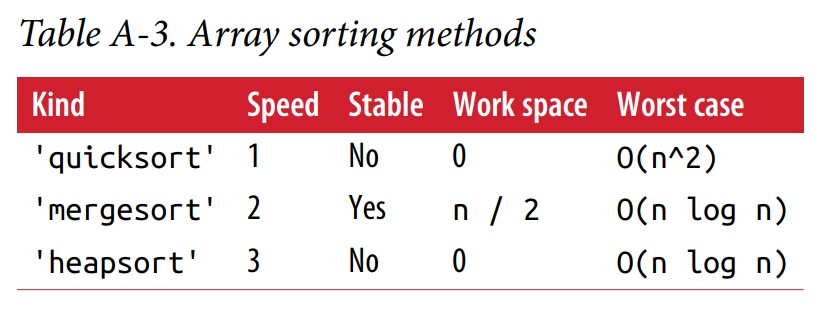
### 부분 정렬 배열

정렬의 목표 중 하나는 배열속에서 가장 큰/작은 원소들을 결정하는 일이다. NumPy는 최적화된 메소드를 가지고 있는데, 그게 k번째로 작은 원소에 대해서 배열을 분할하는  **numpy.partition**, **np.argpartition** 메소드 이다 

In [183]:
np.random.seed(12345)

In [184]:
arr = np.random.randn(20)

In [185]:
arr

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057,
        1.39340583,  0.09290788,  0.28174615,  0.76902257,  1.24643474,
        1.00718936, -1.29622111,  0.27499163,  0.22891288,  1.35291684,
        0.88642934, -2.00163731, -0.37184254,  1.66902531, -0.43856974])

In [186]:
np.partition(arr, 3)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

partition(arr. 3)의 결과에서 첫번째 3원소들은 순서가 없는 가장 작은 3개의 값이다. 
numpy.argpartition은 numpy.argsrot와 유사하지만 동등한 순서로 데이터를 재배열하는 인텍스를 반환한다.

In [187]:
indices = np.argpartition(arr, 3)

In [188]:
indices

array([16, 11,  3,  2, 17, 19,  0,  7,  8,  1, 10,  6, 12, 13, 14, 15,  5,
        4, 18,  9], dtype=int64)

In [189]:
arr.take(indices)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

### numpy.searchsorted : 정렬된 배열에서 원소 찾기
searchsorted는 정렬된 배열상에서 이진 탐색을 수행해 새로운 값을 삽입할 때 정렬된 상태를 계속 유지하기 위해 위치를 반환하는 메소드다.

In [190]:
arr = np.array([0, 1, 7, 12, 15])

In [191]:
arr.searchsorted(9)

3

짐작했듯이 값이 담긴 배열을 넘기면 해당 원소별로 알맞은 위치를 담고 있는 배열을 반환한다

In [ ]:
arr.searchsorted([0, 8, 11, 16])

searchsorted 메소드가 0번째 원소에 대해 0을 반환한 것을 확인할 수 있다.

In [192]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])

In [193]:
arr.searchsorted([0, 1])

array([0, 3], dtype=int64)

In [194]:
arr.searchsorted([0, 1], side='right')

array([3, 7], dtype=int64)

searchsorted의 다른 활용법으로 0부터 10,000까지의 값을 특정 구간별로 나눈 배열을 살펴보면

In [195]:
data = np.floor(np.random.uniform(0, 10000, size=50))

In [196]:
bins = np.array([0, 100, 1000, 5000, 10000])

In [197]:
data

array([ 9940.,  6768.,  7908.,  1709.,   268.,  8003.,  9037.,   246.,
        4917.,  5262.,  5963.,   519.,  8950.,  7282.,  8183.,  5002.,
        8101.,   959.,  2189.,  2587.,  4681.,  4593.,  7095.,  1780.,
        5314.,  1677.,  7688.,  9281.,  6094.,  1501.,  4896.,  3773.,
        8486.,  9110.,  3838.,  3154.,  5683.,  1878.,  1258.,  6875.,
        7996.,  5735.,  9732.,  6340.,  8884.,  4954.,  3516.,  7142.,
        5039.,  2256.])

그리고 각 데이터가 어떤 구간에 속해야 하는 지 알아보기 위해 searchsorted 메소드를 사용하자  
여기서 1은 [0,100) 까지의 구간을 의미함

In [198]:
labels = bins.searchsorted(data)

In [199]:
labels

array([4, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 3], dtype=int64)

이를 pandas의 groupby와 조합하면 쉽게 해당 구간의 데이터를 구할 수 있다.

In [201]:
import pandas as pd
pd.Series(data).groupby(labels).mean()

2     498.000000
3    3064.277778
4    7389.035714
dtype: float64

사실 NumPy에는 위 과정을 계산해주는 digitize 함수가 있다.

In [202]:
np.digitize(data, bins)

array([4, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 3], dtype=int64)

## NumPy matrix 클래스 
MATLAB이나 Julia, GAUSS 같은 다른 행렬연산과 선형대수 위한 언어와 비교하면 NumPy의 선형대수 문법은 좀 장황한 편이다. 이렇게 말할 수 있는 한가지는 이유는 NumPy에서 행렬 곱은 numpy.dot()을 이용해야 하기 때문이다. 또한 NumPy의 색인 구문에 차이가 있기 때문에 파이썬으로 코드를 포팅하는 작업은 때로는 덜 직관적일 수 있다. 2차원 배열에서 하나의 로우를 선택하거나 (X[1, :])칼럼을 선택하게 (X[:, 1]) 되면 MATLAB처럼 2차원 배열이 아니라 1차원 배열을 반환한다.

In [205]:
X = np.random.randn(5, 5)

In [206]:
X

array([[ 0.69000185,  1.00154344, -0.50308739, -0.62227423, -0.92116861],
       [-0.72621349,  0.22289555,  0.0513161 , -1.15771947,  0.81670694],
       [ 0.43360961,  1.01073695,  1.82487521, -0.99751825,  0.8505911 ],
       [-0.1315776 ,  0.91241415,  0.18821068,  2.16946144, -0.1149282 ],
       [ 2.00369736,  0.02961015,  0.79525316,  0.11810975, -0.74853155]])

In [207]:
X[:,0] # 1차원

array([ 0.69000185, -0.72621349,  0.43360961, -0.1315776 ,  2.00369736])

In [208]:
y = X[:, :1] # 슬라이싱에 의한 2차원

In [209]:
X

array([[ 0.69000185,  1.00154344, -0.50308739, -0.62227423, -0.92116861],
       [-0.72621349,  0.22289555,  0.0513161 , -1.15771947,  0.81670694],
       [ 0.43360961,  1.01073695,  1.82487521, -0.99751825,  0.8505911 ],
       [-0.1315776 ,  0.91241415,  0.18821068,  2.16946144, -0.1149282 ],
       [ 2.00369736,  0.02961015,  0.79525316,  0.11810975, -0.74853155]])

In [210]:
y

array([[ 0.69000185],
       [-0.72621349],
       [ 0.43360961],
       [-0.1315776 ],
       [ 2.00369736]])

이 경우 행렬 곱 $y^T X y$는 아래처럼 구할 수 있다.

In [211]:
np.dot(y.T, np.dot(X, y))

array([[-0.88620896]])

NumPy는 많은 행렬연산을 위한 코드 작성을 돕기 위해 MATLAB과 유사하게 단일 로우와 칼럼을 2차 차원으로 반환하고 `*` 연산자를 이용해서 행렬 곱셈을 수행하도록 색인 방법을 변경한 matrix 클래스를 제공한다. 위에서 살펴본 연산은 numpy.matrix를 사용해서 아래처럼 작성할 수 있다.

In [212]:
Xm = np.matrix(X)

In [213]:
ym = Xm[:, 0]

In [214]:
Xm

matrix([[ 0.69000185,  1.00154344, -0.50308739, -0.62227423, -0.92116861],
        [-0.72621349,  0.22289555,  0.0513161 , -1.15771947,  0.81670694],
        [ 0.43360961,  1.01073695,  1.82487521, -0.99751825,  0.8505911 ],
        [-0.1315776 ,  0.91241415,  0.18821068,  2.16946144, -0.1149282 ],
        [ 2.00369736,  0.02961015,  0.79525316,  0.11810975, -0.74853155]])

In [215]:
ym

matrix([[ 0.69000185],
        [-0.72621349],
        [ 0.43360961],
        [-0.1315776 ],
        [ 2.00369736]])

In [216]:
ym.T * Xm * ym

matrix([[-0.88620896]])

matrix 클래스는 역행렬을 반환하는 특수한 속성, `I`를 가지고 있다.

In [217]:
Xm.I * X

matrix([[  1.00000000e+00,   2.73626323e-16,  -5.80315969e-18,
          -7.07922177e-17,  -1.66139367e-16],
        [  3.19382285e-16,   1.00000000e+00,  -3.30830865e-16,
           3.41327270e-17,  -5.34572154e-16],
        [ -1.68517960e-16,  -1.21329826e-16,   1.00000000e+00,
           1.66222301e-16,   3.45635678e-16],
        [  2.27104527e-18,   1.40318754e-16,   6.24339312e-17,
           1.00000000e+00,  -2.54084605e-19],
        [ -2.99376143e-16,   3.11899794e-16,   2.36209730e-16,
          -3.18151726e-16,   1.00000000e+00]])

저자가 일반적인 목적의 ndarray를 numpy.matrix로 대체해 사용하는 걸 추천하지 않는데, 그 이우는 좀처럼 그렇게 사용하지 않기 때문이다. 선형대수를 위한 많은 개별 함수에는 전달받은 함수의 인자를 matrix로 변환하고 데이터를 복사하지 않는 np.asarray를 사용해서 반환하기 전에 평범한 배열로 다시 변환하는 것이 좀 더 유용할 것이다.

## Writing Fast NumPy Functions with Numba!
Cpython, Numba, NumPy , 가상화 검색

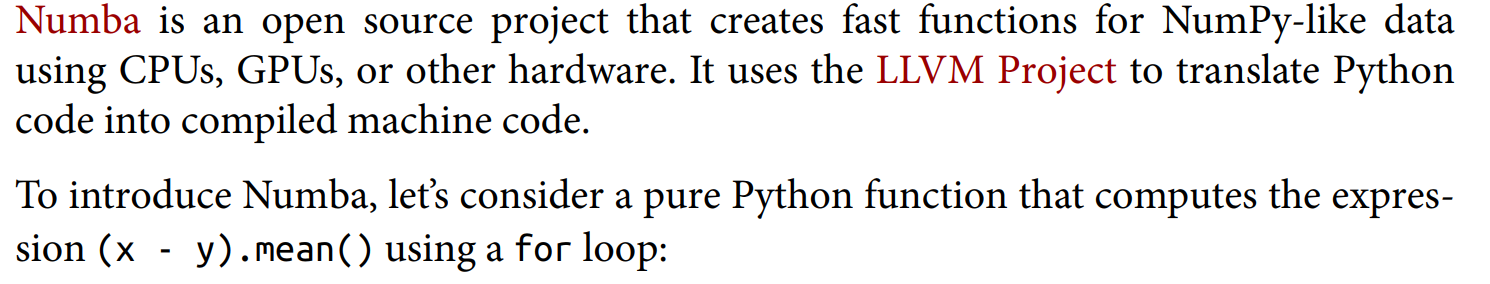

In [3]:
import numpy as np

def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

x = np.random.randn(10000000)
y = np.random.randn(10000000)

In [219]:
%timeit mean_distance(x, y)
%timeit (x - y).mean()

4.29 s ± 73.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
52.5 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


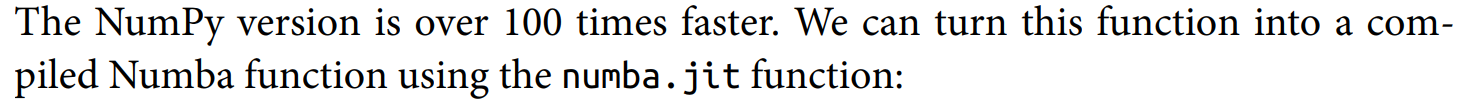

In [4]:
import numba as nb

numba_mean_distance = nb.jit(mean_distance)

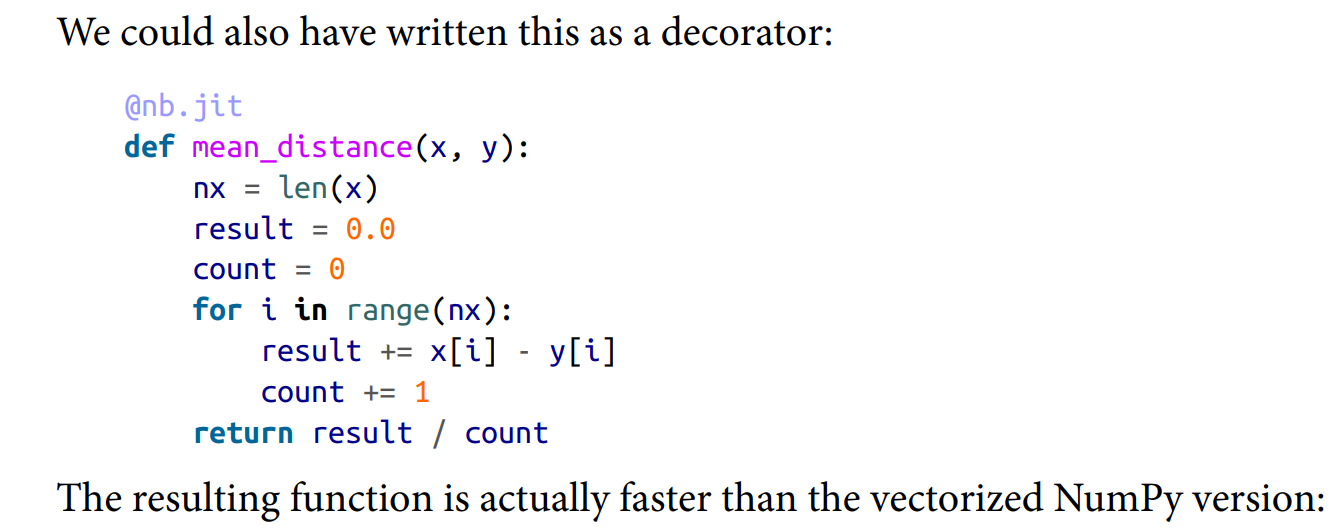

In [5]:
@nb.jit #데코레이터는 중급 파이썬 문법 책 참조 쉽게 말하면 재사용 불가능? 함수의 확장 
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

In [6]:
%timeit numba_mean_distance(x, y) # the resulting function is actually faster than the vectorized Numpy version

13.5 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


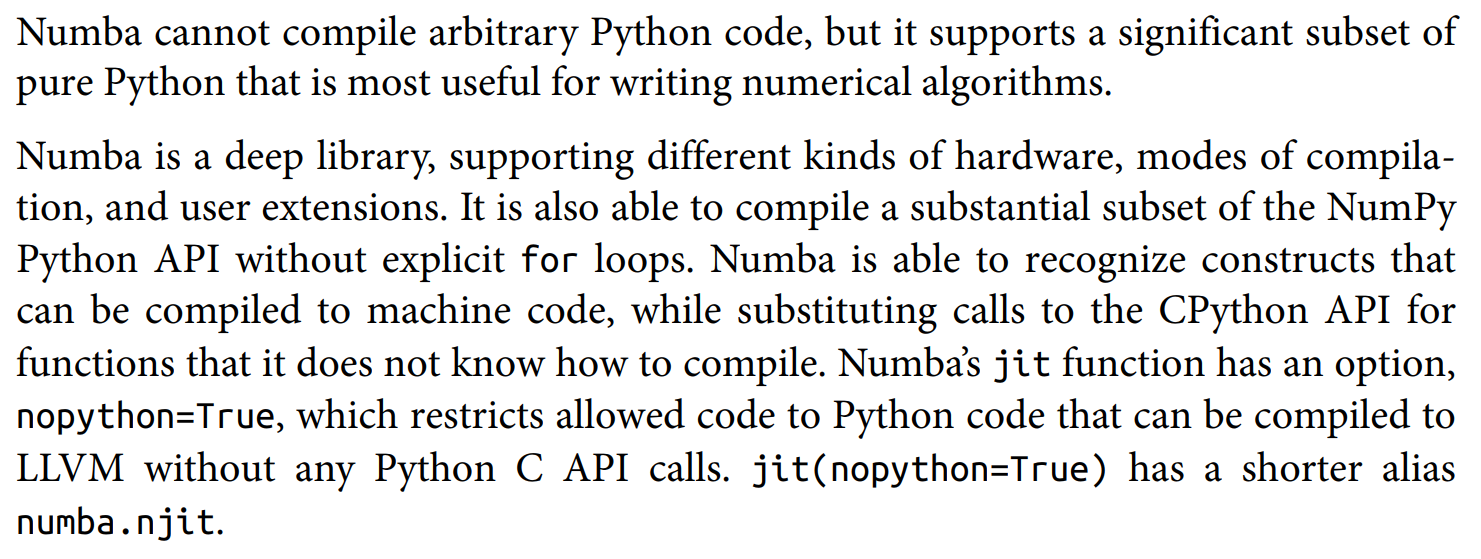

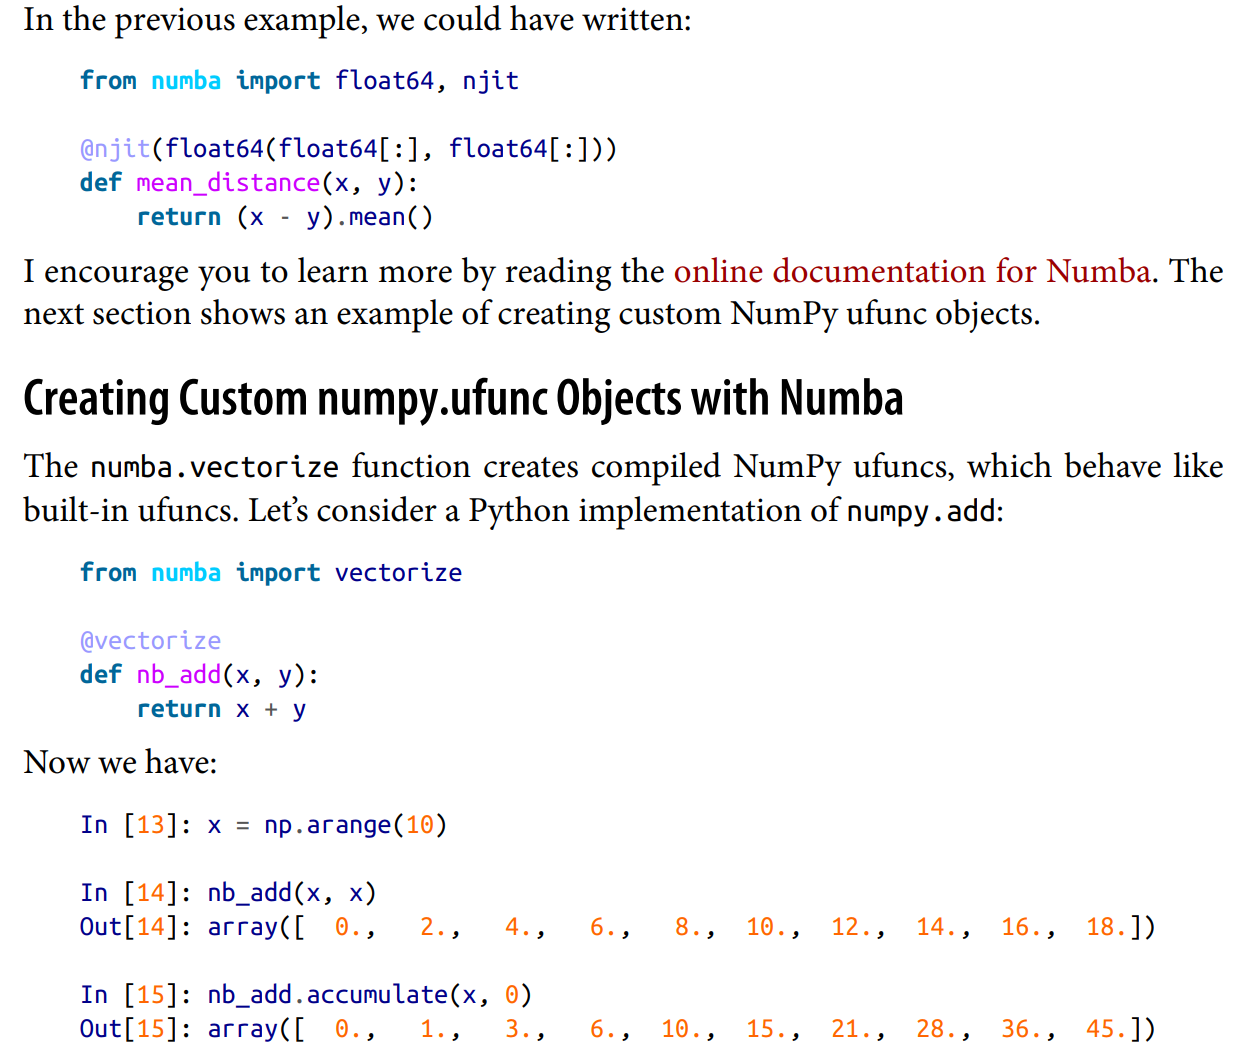

In [13]:
from numba import float64, njit

@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x - y).mean()

In [7]:
from numba import vectorize
@vectorize
def nb_add(x, y):
    return x + y

In [11]:
x = np.arange(10)

In [12]:
nb_add(x, x)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18], dtype=int64)

In [24]:
nb_add.accumulate(x, 0) # bug

ValueError: could not find a matching type for nb_add.accumulate, requested type has type code 'l'

## 고급 배열 입$ \centerdot $  출력
4장에서 np.save와 np.load를 사용해서 배열을 이진 형식으로 디스크에 저장하는 방법을 소개했는데, 여기에서는 이를 좀 더 우아하게 사용할 수 있는 몇 가지 부가적인 옵션을 소개한다.  특히 매모리 맵은 RAM에 적재할 수 없는 데이터를 다룰 때 추가적인 이점을 얻을 수 있다.
### 메모리 맵 파일
_메모리 맵 파일_은 디스크에 저장된 아주 큰 이진 데이커를 메모리에 적재된 배열처럼 취급할 수 있다. NumPy에는 ndarray 와 유사한 memmap 객체가 있는데, 배열 전체를 메모리에 적재하지 않고 큰 파일의 작은 부분을 읽고 쓸 수 있도록 해준다. 게다가 memmap 객체는 메모리에 적재된 배열에서 제공하는 것과 동일한 메소드를 제공하기 때문에 ndarray를 사용해야 하는 많은 알고리즘에서 ndarray의 대체제로 사용할 수 있다.  

새로운 memmap 객체를 생성하려면 np.memmap 함수에 파일 경로와 dtype, 모양 그리고 파일의 모드를 전달해야 한다.

In [25]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+',shape=(10000, 10000))

In [26]:
mmap

memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

memmap 객체의 슬라이스는 디스크에 있는 데이터에 대한 뷰를 반환한다

In [27]:
section = mmap[:5]

여기에 데이터를 입력하면 파이썬의 파일 객체처럼 메모리에 잠시 보관(buffered) 되어 있다가 flush를 호출하면 디스크에 기록하게 된다.

In [28]:
section[:] = np.random.randn(5, 10000)

In [29]:
mmap.flush()

In [30]:
mmap

memmap([[ 0.98697485,  0.01189817, -0.41075082, ..., -0.66815847,
          2.28025804, -0.48823984],
        [ 1.84679766, -0.45117266, -1.59716325, ...,  1.02409916,
         -1.05948314, -0.63492505],
        [ 2.14108384,  0.35510293,  0.21558858, ...,  0.15888154,
         -0.87671595, -0.67765393],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [31]:
del mmap

메모리 맵은 스코프를 벗어나 메모리가 회수되면(garbage - collected) 디스크에 변경 사항이 기록된다. _기존의 메모리 맵 파일을 열 때_   
메타데이터 없이 디스크에 저장된 이진 데이터 파일처럼 dtype과 모양을 지정할 수 있다.

In [32]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))

In [33]:
mmap

memmap([[ 0.98697485,  0.01189817, -0.41075082, ..., -0.66815847,
          2.28025804, -0.48823984],
        [ 1.84679766, -0.45117266, -1.59716325, ...,  1.02409916,
         -1.05948314, -0.63492505],
        [ 2.14108384,  0.35510293,  0.21558858, ...,  0.15888154,
         -0.87671595, -0.67765393],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

메모리 맵은 디스크 상의 ndarray이므로 위에서 설명한 것 처럼 구조화된 dtype을 사용하는데 아무런 문제가 없다.

### HDF5 및 기타 배열 저장 옵션
PyTables와 h5py는 효율적이며, HDF5 형식 (Hierarchical Data Format의 약자)으로 압축할 수 있도록 배열 데이터를 저장할 수 있게 하는 NumPy 친화저인 인터페이스의 파이썬 프로젝트다. 또한 수백 기가 혹은 수백 테라 바이트의 데이터를 HDF5 형식으로 안전하게 저장할 수 있다. 이 라이브러리의 사용 방법은 ... 초보 수준을 벗어난다.  (pandas 문서를 봐야한다)

PyTable는 구조화된 배열을 진보된 질의 기능 및 질의 속도를 높일 수 있도록 칼럼 색인을 추가하는 기능과 함께 사용할 수 있도록 한다. 이는 관계형 데이터베이스에서 제공하는 테이블 색인 기능과 매우 유사하다.  

## 성능 팁
NumPy를 활용하는 코드에서 좋은 성능을 이끌어내는 방법은 상당히 직관적인데, 순수 파이썬 반복문은 상대적으로 매우 느리므로 일반적인 배열 연산으로 대체한다.
* 파이썬 반복문과 조건문을 배열연산과 불리언 배열연산으로 반환한다.
* 가능한 한 브로드캐스팅을 사용한다.
* 배열의 뷰(슬라이스)를 사용해 데이터를 복사하는 것을 피한다.
* ufunc 메소드를 활용한다.
NumPy를 만으로 원하는 성능을 이끌어내지 못한다면 코드를 C나 포트란으로 작성하거나 아니면 Cython을 사용해 성능을 향상시킬 수 있다. 
### 인접 메모리의 중요성
이 주제에 대한 전체 내용은 이 책의 범위를 벗어나는데, 어떤 애플리캐이션에서는 배열이 메모리 상에 배치된 모양에 따라 연산 속도에 많은 영향을 끼친다. 이는 부분적으로 CPU의 캐시 구조에 의한 성능 차이에 기반하며 연속된 메모리에 접근하는 연산 ( 예를 들어 C 순서로 저장된 배열에서 로우로 합산하는)의 경우, 메모리 서브시스템이 적절한 메모리 블럭을 매우 빠른 CPU의 L1이나 L2에 저장하게 되므로 가장 빠르다. 또한 NumPy의 C코드 기반 내부의 어떤 코드는 연속된 메모리일 경우에 최적화되어 인접하지 않은 메모리를 읽게 되는 문제를 피할 수 있다.  

배열이 메모리 상에 연속적으로 존재한다는 의미는 배열의 원소가 실제 배열 상에 나타나는 모습대로 (포트란의 칼럼 우선 순위, C의 로우 우선순위) 메모리에 저장되었다는 의미다. 기본적으로 NumPy 배열은 메모리에 C 순서 혹은 그냥 단순히 연속적으로 생성된다. C순서로 저장된 배열의 전치 배열 같은 칼럼 우선순위 배열은 포트란 순서 배열이라고 할 수 있다. 이 속성은 ndarray의 flags 속성을 통해 명시적으로 확인할 수 있다.

In [34]:
arr_c = np.ones((1000, 1000), order='C')

In [35]:
arr_f = np.ones((1000, 1000), order='F')

In [36]:
arr_c.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [37]:
arr_f.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [38]:
arr_f.flags.f_contiguous

True

예제에서 이 배열의 로우 합은 메모리에 로우가 연속적으로 존재하므로 이론적으로 arr`_`c가 arr`_`f 보다 빠르게 계산된다.  
`%`timeit을 사용해서 성능차를 확인해볼 수 있다.

In [39]:
%timeit arr_c.sum(1)

848 µs ± 51.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit arr_f.sum(1)

574 µs ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


이는 NumPy에서 성능을 더 이끌어내야 할 때 더 많은 노력을 기울이기 되는 부분이다. 원하는 메모리 순서로 저장되지 않은 배열이 있다면 그배열을 `C`나`F`순서로 복사해서 사용할 수 있다.

In [41]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

한 배열을 대한 뷰를 생성할 때 그 결과가 항상 연속된 메모리에 할당되지 않을 수도 있다는 점을 기억하자

In [42]:
arr_c[:50].flags.contiguous

True

In [43]:
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

### 기타 성능 옵션 : Cython, f2py, C
최근 몇 년간 Cython 프로젝트는 많은 과학계산 파이썬 개발자가 C나C++ 라이브러리와 함께 작동할 필요가 있지만 순수C 코드를 작성할 필요 없이 빠른 코드를 구현하기 위한 도구로 선택되었다. Cython은 정적 자료형과 C로 작성된 코드를 파이썬 스타일의 코들에 끼워 넣을 수 있는 기능을 가진 파이썬이라고 생각하면 된다. 예를 들어 1차원 배열에서 각 원소의 합을 구하는 간단한 Cython 함수는 아래와 같다.

```python
from numpy cimport ndarray, float64_

def sum_elements(ndarray[float64_] arr):
    cdef Py_ssize_t i, n = len(arr)
    cdef float64_t result = 0
    
    for i in range(n):
        result += arr[i]
        
    return result
    ```

Cython은 이 코드를 C로 변환한 후에 생성된 C 코드를 컴파일해서 파이썬 확장을 생성한다. Cython은 순수 파이썬 코드를 작성하는 시간에 아주 약간의 시간을 더 할애해서 NumPy와 유기적으로 작동하면서도 더 나은 성능을 얻을 수있는 매력적인 옵션이다. 일반적으로 작업 흐름은 파이썬에서 동작하는 알고리즘을 작성하고 그 알고리즘을 자료형 선언과 다른 유용한 수정을 통해 Cython을 코드로 변환하는 것이다. 자세한 거는 Cython 프로젝트 문서를 참고.  

NumPy를 활용하는 고성능 코드를 작성하기 위한 다른 옵션으로는 포트란 77과 포트란 90코드를 위한 래퍼를 생성해주는 f2py와 순수 C 확장을 작성하는 방법이 있다.